In [1]:
import numpy as np
import networkx as nx
import sys
sys.path.append("..")
from labelpropagation.label_propagation import LabelPropagation
from collections import Counter
import matplotlib.pyplot as plt
import time

In [10]:
def draw_graph(graph, label_map, title):
    colors = [label_map.get(node) for node in graph.nodes()]
    plt.subplot(111)
    nx.draw(graph, with_labels=graph.nodes, node_color=colors)
    plt.title(title)
    plt.show()

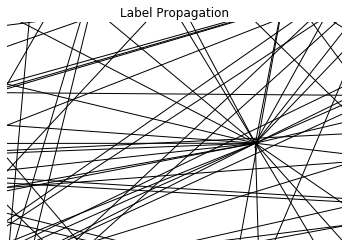

In [11]:
params = {"n": 100, "tau1": 3, "tau2": 2, "mu": 0.5, "min_degree": 10, "max_degree": 10}
# G = nx.LFR_benchmark_graph(params["n"], params["tau1"], params["tau2"], params["mu"],
#                         min_degree=params["min_degree"],
#                         max_degree=params["max_degree"],
#                         max_iters=5000,
#                         )
G = nx.barabasi_albert_graph(100, 5)
lp = LabelPropagation(network=G)
draw_graph(G, lp.node_labels, "Label Propagation")

0.581387996673584
3


c:\python\python35\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


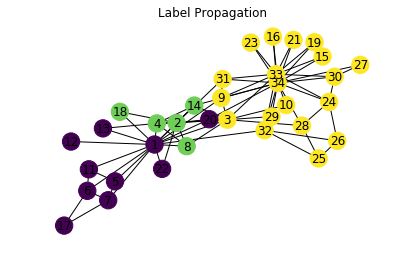

In [11]:
lp = LabelPropagation("../data/ucidata-zachary/out.ucidata-zachary", "U")

start_time = time.time()
graph, labels = lp.start(label_ties_resolution="retention", convergence_criterium="strong-community",
                         order="asynchronous", weighted=False)
print(time.time() - start_time)
print(len(Counter(labels.values())))
draw_graph(graph, labels, "Label Propagation")

4.194738388061523
5


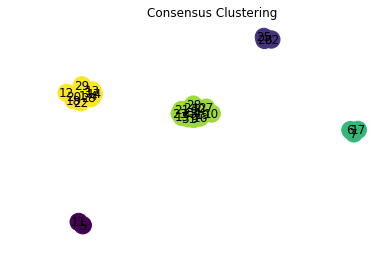

In [12]:
start_time = time.time()
graph, labels = lp.consensus_clustering(label_ties_resolution="retention", convergence_criterium="strong-community",
                                        order="asynchronous", threshold=0.5, number_of_partitions=12, weighted=False)
print(time.time() - start_time)
print(len(Counter(labels.values())))
draw_graph(graph, labels, "Consensus Clustering")

1.2037789821624756
5


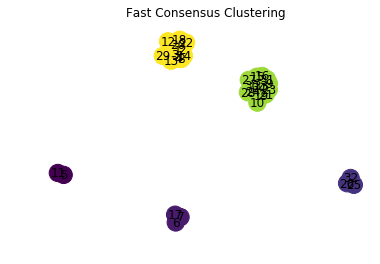

In [13]:
start_time = time.time()
graph, labels = lp.consensus_clustering(label_ties_resolution="retention", convergence_criterium="strong-community",
                                        order="asynchronous", threshold=0.5, number_of_partitions=12, weighted=False, fcc=True, convergence_factor=0.02)
print(time.time() - start_time)
print(len(Counter(labels.values())))
draw_graph(graph, labels, "Fast Consensus Clustering")

BLa
CONNECTIVITY
1
0.02191305160522461
1
3



c:\python\python35\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


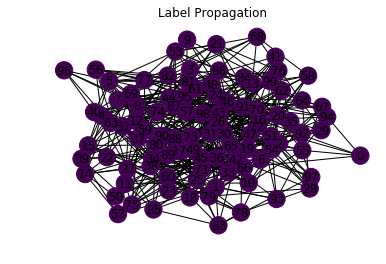

BLa
CONNECTIVITY
1
0.1925063133239746
1
2

BLa
CONNECTIVITY
1
7.81506609916687
1
2



In [ ]:
no_of_nodes = [100, 1000, 10000, 100000, 1000000]
for n in no_of_nodes:
    G = nx.erdos_renyi_graph(n, 0.1)
    print("BLa")
    lp = LabelPropagation(network=G)
    start_time = time.time()
    graph, labels = lp.start(label_ties_resolution="retention", convergence_criterium="strong-community",
                             order="asynchronous", weighted=False)
    print(time.time() - start_time)
    print(len(Counter(labels.values())))
    print(lp.iterations)
    print()
    
    if n == 100:
        draw_graph(graph, labels, "Label Propagation")